In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, f1_score

from numpy import linspace, mean

### Carregar e visualizar os dados - Regressão

In [21]:
df = pd.read_csv('datasets\colesterol.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [23]:
df.drop('Id', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [24]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,0,1,0,0,0,1,0,0,1
996,51,47.7,170,128.03,0,0,0,1,1,0,1,0,0
997,39,85.5,176,211.14,0,1,0,0,1,0,0,1,0
998,61,91.2,161,284.53,0,1,0,0,0,1,0,1,0


### Treinar modelo de Regressão Linear, visualizando a curva de aprendizado 

In [25]:
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [27]:
model_reg = LinearRegression() 

In [28]:
# Gerar Scores da Curva de Aprendizado - Regressão
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [29]:
train_scores

array([[-47.58887954, -75.69487868, -75.69487868],
       [-55.315875  , -89.72791378, -89.72791378],
       [-61.69363304, -82.36590753, -82.36590753],
       [-69.83143109, -81.25274131, -81.25274131],
       [-68.70592887, -89.46536178, -89.46536178],
       [-75.79423408, -93.03061227, -84.2657918 ],
       [-76.24206849, -91.02465277, -81.11018744],
       [-76.30320357, -88.75879403, -80.47182658],
       [-78.61863026, -89.59944513, -81.93603821]])

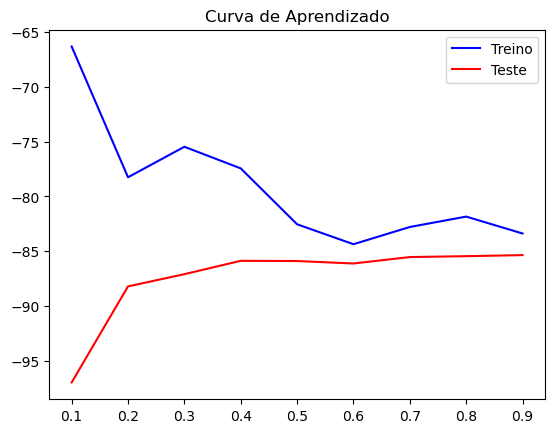

In [30]:
# Plot da curva de aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color = 'b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color = 'r', label='Teste')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()

## Carregar e preparar dados - Classificação

In [2]:
df2 = pd.read_csv('datasets/fruit.csv')

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [4]:
# Visualizar df2
df2.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [5]:
# Ajustar df2

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

In [6]:
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


## Treinar modelo KNN com mudança de K

In [7]:
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [12]:
# Faz um loop para treinar o modelo com diversas quantidades de vizinhos (K)
scores_train = []
scores_test = []
for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))
    print(f'{i}: F1 Score (Train): {f1_score(y_train, y_train_pred)} - F1 Score (Test): {f1_score(y_test, y_test_pred)}')


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

1: F1 Score (Train): 1.0 - F1 Score (Test): 0.8848039215686274
3: F1 Score (Train): 0.9445137157107231 - F1 Score (Test): 0.9108669108669109


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

5: F1 Score (Train): 0.9294373640037302 - F1 Score (Test): 0.9053398058252428
7: F1 Score (Train): 0.9247512437810944 - F1 Score (Test): 0.9008567931456548


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

9: F1 Score (Train): 0.9183098591549296 - F1 Score (Test): 0.9099756690997568


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

11: F1 Score (Train): 0.9137340392401121 - F1 Score (Test): 0.9086419753086419


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

13: F1 Score (Train): 0.9096592685214129 - F1 Score (Test): 0.8951911220715166
15: F1 Score (Train): 0.9089775561097256 - F1 Score (Test): 0.8910648714810282


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

17: F1 Score (Train): 0.9085232594442709 - F1 Score (Test): 0.8948655256723717
19: F1 Score (Train): 0.909204368174727 - F1 Score (Test): 0.8913308913308913


c:\Users\Luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
# Criar um df com os scores
df2_results = pd.DataFrame({'K': range(1, 20, 2), 'F1 Score (Train)': scores_train, 'F1 Score (Test)': scores_test})    

In [14]:
df2_results

,K,F1 Score (Train),F1 Score (Test)
0,1,1.000000,0.884804
1,3,0.944514,0.910867
2,5,0.929437,0.905340
3,7,0.924751,0.900857
4,9,0.918310,0.909976
5,11,0.913734,0.908642
6,13,0.909659,0.895191
7,15,0.908978,0.891065
8,17,0.908523,0.894866
9,19,0.909204,0.891331


In [17]:
xaxis = x = [i for i in range(1, 20, 2)]
fig = px.line(df2_results, x='K', y=['F1 Score (Train)', 'F1 Score (Test)'], title='KNN Performance')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in xaxis])
fig.show()